In [13]:
import keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Add, Activation, Input, BatchNormalization, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#import data
import h5py
import numpy as np

train_set = h5py.File('train_signs.h5', 'r')
train_x = np.array(train_set['train_set_x'][:])
train_y = np.array(train_set['train_set_y'][:])
classes = np.array(train_set['list_classes'].shape[0])

test_set = h5py.File('test_signs.h5', 'r')
test_x = np.array(test_set['test_set_x'][:])
test_y = np.array(test_set['test_set_y'][:])

The label of this picture is 5
There are 6 classes


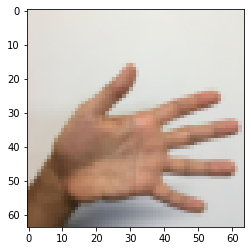

In [15]:
#show our data
plt.imshow(train_x[0])
print('The label of this picture is', train_y[0])
print('There are', classes, 'classes')

In [16]:
#data preprocessing
x_train = train_x / 255
x_test = test_x / 255

y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

print('trainset has', x_train.shape[0], 'pictures')
print('dataset has', x_test.shape[0], 'pictures')
print('the shape of train data is', x_train.shape)
print('the shape of test data is', x_test.shape)

trainset has 1080 pictures
dataset has 120 pictures
the shape of train data is (1080, 64, 64, 3)
the shape of test data is (120, 64, 64, 3)


In [17]:
def identity_block(x, f, k):
    
    f1, f2, f3 = f
    x_shortcut = x
    
    #convolution path
    x = Conv2D(filters = f1, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f2, kernel_size = (k, k), strides = (1, 1), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(x)
    x = BatchNormalization(axis = 3)(x)
    
    #add
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)
    
    return x

In [18]:
def convolutional_block(x, f, k, s):
    
    f1, f2, f3 = f
    x_shortcut = x
    
    #convolution path
    x = Conv2D(filters = f1, kernel_size = (1, 1), strides = (s, s), padding = 'valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f2, kernel_size = (k, k), strides = (1, 1), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(x)
    x = BatchNormalization(axis = 3)(x)
    
    #identity path
    x_shortcut = Conv2D(filters = f3, kernel_size = (1, 1), strides = (s, s), padding = 'valid')(x_shortcut)
    x_shortcut = BatchNormalization(axis = 3)(x_shortcut)
    
    #add
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)
    
    return x

In [19]:
x_input = Input(shape = (64, 64, 3))

x = ZeroPadding2D((3, 3))(x_input)

x = Conv2D(64, (7, 7), strides = (2, 2))(x)
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides = (2, 2))(x)

x = convolutional_block(x, [64, 64, 256], 3, 1)
x = identity_block(x, [64, 64, 256], 3)
x = identity_block(x, [64, 64, 256], 3)

x = convolutional_block(x, [128, 128, 512], 3, 2)
x = identity_block(x, [128, 128, 512], 3)
x = identity_block(x, [128, 128, 512], 3)
x = identity_block(x, [128, 128, 512], 3)

x = convolutional_block(x, [256, 256, 1024], 3, 2)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)
x = identity_block(x, [256, 256, 1024], 3)

x = convolutional_block(x, [512, 512, 2048], 3, 2)
x = identity_block(x, [512, 512, 2048], 3)
x = identity_block(x, [512, 512, 2048], 3)

x = AveragePooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(classes, activation = 'softmax')(x)

model = Model(inputs = x_input, outputs = x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, 32, 32, 64)   9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_105 (BatchN (None, 32, 32, 64)   256         conv2d_105[0][0]                 
__________________________________________________________________________________________________
activation

In [ ]:
import time
from keras.callbacks import ModelCheckpoint
from keras import optimizers

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("resnet101.h5", monitor='val_acc', verbose=1, mode='max', save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, validation_split=0.15, epochs=100, batch_size=32, callbacks=[checkpoint])
end = time.time()

print("Total time: ", end - start)

Train on 918 samples, validate on 162 samples
Epoch 1/100


In [ ]:
model = keras.models.load_model("resnet101.h5")
pred = model.evaluate(x_test, y_test)
print('loss is', pred[0])
print('accuracy is', pred[1])

In [10]:
np.save('r101_loss.npy', history.history['loss'])
np.save('r101_acc.npy', history.history['acc'])
np.save('r101_vloss.npy', history.history['val_loss'])
np.save('r101_vacc.npy', history.history['val_acc'])